In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['font.family']= 'NanumGothic' 
plt.rcParams['axes.unicode_minus']=False

In [127]:
# 데이터 불러오기
df = pd.read_csv('saramin_jobs_0202.csv')

In [128]:
df

,today,title,company,url,deadline,location,experience,requirement,jobtype,jobpart
0,2025-02-02,서울대학교병원 AI/데이터사이언스 연구원 및 대학원생 채용,서울대학교병원,https://www.saramin.co.kr/zf_user/jobs/relay/v...,~ 03/19(수),서울 종로구,경력무관,대졸↑,계약직,"데이터엔지니어, 데이터분석가"
1,2025-02-02,서울아산병원 빅데이터센터 & 정보의학과 연구원 모집,서울아산병원,https://www.saramin.co.kr/zf_user/jobs/relay/v...,~ 02/14(금),서울 송파구,경력무관,초대졸↑,위촉직,"데이터분석가, 데이터마이닝"
2,2025-02-02,[캐시워크] 데이터분석 담당 채용전환형 인턴,넛지헬스케어(주),https://www.saramin.co.kr/zf_user/jobs/relay/v...,~ 03/08(토),서울 강남구,신입,대졸↑,인턴직,"데이터엔지니어, 데이터분석가"
3,2025-02-02,데이터분석 및 데이터엔지니어 채용(신입/경력),(주)디리아,https://www.saramin.co.kr/zf_user/jobs/relay/v...,~ 02/14(금),서울 서초구,경력무관,대졸↑,정규직,"데이터엔지니어, 데이터분석가"
4,2025-02-02,현대카드 아멕스팀 사무직 채용 데이터추출 및 분석/DW/엑셀/OA,(주)씨아이템프러리,https://www.saramin.co.kr/zf_user/jobs/relay/v...,~ 02/05(수),서울 영등포구,경력무관,학력무관,계약직,"데이터엔지니어, 데이터분석가"
...,...,...,...,...,...,...,...,...,...,...
29602,2025-02-02,영업/마케팅 및 경영지원 분야 채용공고,오스템임플란트(주),https://www.saramin.co.kr/zf_user/jobs/relay/v...,~ 02/28(금),전국,신입·경력,대졸↑,정규직·계약직,NaN
29603,2025-02-02,25년 ㈜ 스텍 상반기 관리직 대규모 채용 공고 안내(서울/천안),(주)스텍,https://www.saramin.co.kr/zf_user/jobs/relay/v...,~ 02/09(일),서울 구로구,경력무관,학력무관,정규직,NaN
29604,2025-02-02,2025년 엠투아이코퍼레이션 [신입/경력] 채용공고,(주)엠투아이코퍼레이션,https://www.saramin.co.kr/zf_user/jobs/relay/v...,~ 02/16(일),경기 안양시 동안구,경력무관,학력무관,정규직·계약직,NaN
29605,2025-02-02,신입 및 경력직원 채용공고,(주)유엔에이엔지니어링,https://www.saramin.co.kr/zf_user/jobs/relay/v...,~ 02/28(금),경기 군포시,신입·경력,학력무관,정규직·계약직,NaN


데이터 컬럼\
today: 데이터 수집 날짜 (2025-01-28)\
title: 공고 제목\
company: 회사명\
url: 공고 상세 페이지 링크\
deadline: 채용 마감일\
location: 근무 지역\
experience: 경력 요구 사항 (신입, 경력무관 등)\
requirement: 학력 요구 사항 (초대졸↑, 대졸↑ 등)\
jobtype: 고용 형태 (정규직, 계약직, 인턴 등)

## 분석 방향
#### 1.지역별 채용 공고 분포
어느 지역에서 가장 많은 채용이 이루어지고 있는지 분석\
서울, 경기 등 주요 도시별 채용 공고 수 시각화

#### 2.경력 요구 사항 분석
신입 vs 경력직 공고 비율\
경력 요구 사항별 직무/회사 특징 분석

#### 3.고용 형태 분석
정규직, 계약직, 인턴 등의 비율 분석\
특정 산업군에서 어떤 형태의 고용이 많은지 탐색

#### 4.채용 마감일 트렌드?
특정 기간 내에 마감되는 공고 수 분석 (2월 초~3월 초)

#### 5.기업별 채용 공고 개수
어떤 회사가 가장 많은 공고를 내고 있는지 분석\
특정 기업이 지속적으로 채용을 진행하는지 탐색

#### 6.직무별 분석
데이터 직무별 요구하는 학력/경력 패턴 분석\
특정 직무에서 요구하는 자격 조건(예: 학력, 경험 등)의 경향

In [69]:
df['location'].value_counts()

location
서울 강남구     3920
서울 서초구     2168
서울 중구      1604
전국         1565
서울 영등포구    1260
           ... 
충남 부여군        1
전북전체          1
전북 전주시        1
경북 의성군        1
경력무관          1
Name: count, Length: 267, dtype: int64

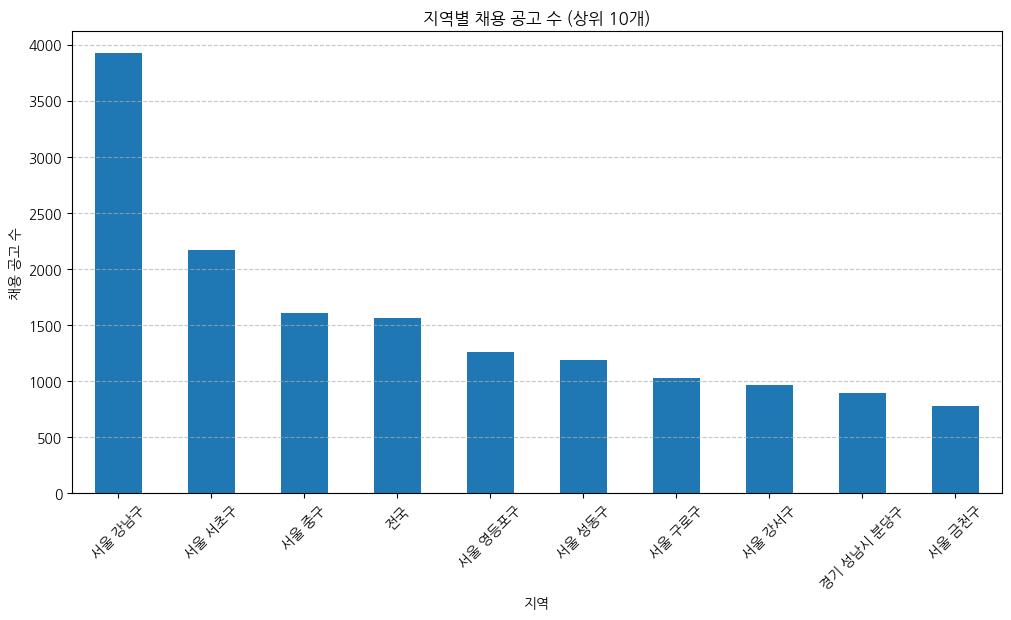

In [70]:
# 지역별 채용 공고 수 계산
location_counts = df['location'].value_counts()

# 상위 10개 지역만 시각화
top_locations = location_counts.head(10)

# 그래프 그리기
plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar')
plt.xlabel("지역")
plt.ylabel("채용 공고 수")
plt.title("지역별 채용 공고 수 (상위 10개)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 표시
plt.show()


In [12]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/fc/ab/d1f47c48a14e17cd487c8b467b573291fae75477b067241407e7889a3692/folium-0.19.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/f8/9d/91cddd38bd00170aad1a4b198c47b4ed716be45c234e09b835af41f4e717/branca-0.8.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   ----------------------------- ---------- 81.9/110.5 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 110.5/110.5 kB 1.6 MB/s eta 0:00:00


In [72]:
import folium

# 대한민국 주요 도시 중심 좌표
city_coords = {
    "서울": [37.5665, 126.9780],
    "경기": [37.274, 127.010],
    "부산": [35.1796, 129.0756],
    "대구": [35.8714, 128.6014],
    "인천": [37.4563, 126.7052],
    "광주": [35.1595, 126.8526],
    "대전": [36.3504, 127.3845],
    "울산": [35.5384, 129.3114],
    "세종": [36.4800, 127.289],
    "강원": [37.8228, 128.1555],
    "충북": [36.6362, 127.491],
    "충남": [36.6588, 126.6728],
    "전북": [35.7175, 127.1475],
    "전남": [34.8679, 126.9910],
    "경북": [36.5759, 128.7341],
    "경남": [35.2371, 128.6929],
    "제주": [33.4996, 126.5312],
}

# 지역별 채용 공고 수 집계 (광역시/도 기준)
region_counts = {}
for loc, count in df['location'].value_counts().items():
    for region in city_coords.keys():
        if region in loc:  # 지역명이 포함된 경우 해당 지역으로 집계
            region_counts[region] = region_counts.get(region, 0) + count

# 지도 생성 (대한민국 중심 좌표)
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# 마커 추가
for city, coords in city_coords.items():
    count = region_counts.get(city, 0)
    if count > 0:
        folium.CircleMarker(
            location=coords,
            radius=count / 50,  # 공고 수에 비례한 크기 (조정 가능)
            color="red",
            fill=True,
            fill_color="red",
            fill_opacity=0.6,
            popup=f"{city}: {count}건",
        ).add_to(m)

# 지도 표시
m


In [73]:
df['experience'].value_counts()

experience
신입·경력        9672
경력무관         7060
경력3년↑        1766
신입           1165
경력5년↑        1075
             ... 
경력 6~18년        1
경력 4~16년        1
경력 4~30년        1
경력 3~100년       1
학력무관            1
Name: count, Length: 197, dtype: int64

In [22]:
!pip install ace_tools

  Obtaining dependency information for ace_tools from https://files.pythonhosted.org/packages/27/c4/402d3ae2ecbfe72fbdcb2769f55580f1c54a3ca110c44e1efc034516a499/ace_tools-0.0-py3-none-any.whl.metadata


In [74]:
# 경력 요구 사항을 그룹화하는 함수 수정 (경력은 3년 이상으로 통합)
def categorize_experience(exp):
    if "무관" in exp:
        return "경력 무관"
    elif "신입·경력" in exp:
        return "신입·경력"
    elif "신입" in exp and "경력" not in exp:
        return "신입"
    elif "경력" in exp:
        import re
        years = re.findall(r'\d+', exp)
        if years:
            min_year = int(years[0])  # 최소 연차 기준으로 판단
            if min_year >= 15:
                return "경력 15년 이상"
            elif min_year >= 10:
                return "경력 10년 이상"
            elif min_year >= 5:
                return "경력 5년 이상"
            elif min_year >= 3:
                return "경력 3년 이상"
        return "경력 3년 이상"  # 연차 정보가 없으면 기본적으로 '경력 3년 이상'으로 분류
    else:
        return "경력 3년 이상"  # 기타 경우 기본적으로 '경력 3년 이상'으로 분류

# 새로운 컬럼 생성
df["experience_group"] = df["experience"].apply(categorize_experience)

# 그룹별 공고 수 계산
grouped_experience_counts = df["experience_group"].value_counts()

In [75]:
experience_grouped_df

,경력 요구 그룹,공고 수
0,경력 무관,1523
1,경력 3년 이상,1017
2,신입·경력,818
3,경력 5년 이상,319
4,신입,250
5,경력 10년 이상,58
6,경력 15년 이상,13


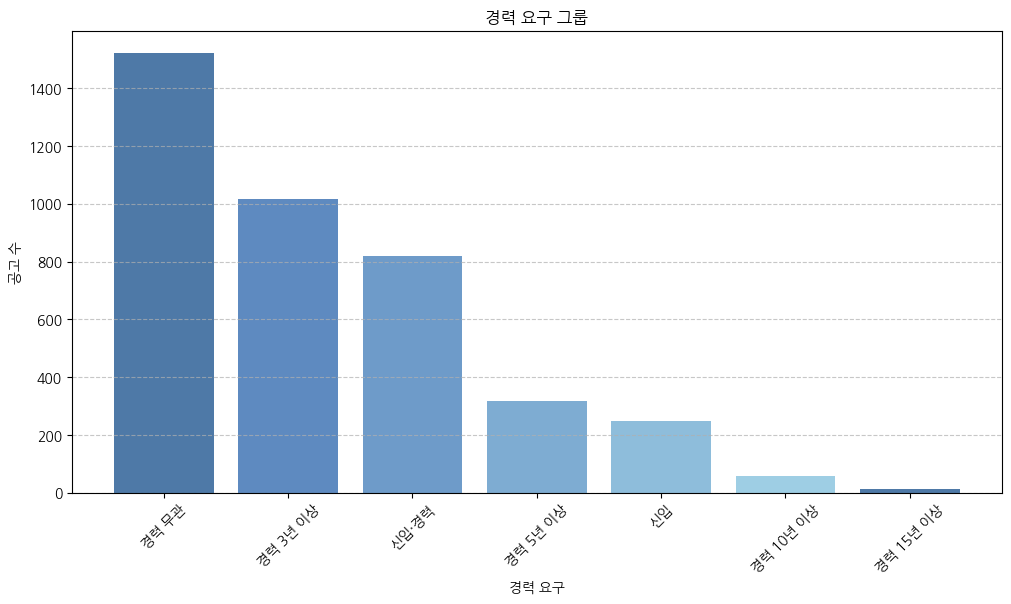

In [76]:
colors = ['#4E79A7', '#5E8AC0', '#6E9BC9', '#7EACD2', '#8EBDDB', '#9ECEE4']
# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(experience_grouped_df['경력 요구 그룹'], experience_grouped_df['공고 수'], color= colors)
plt.xlabel('경력 요구')
plt.ylabel("공고 수")
plt.title("경력 요구 그룹")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 표시
plt.show()


In [81]:
# 기업별 채용 공고 수 계산
company_counts = df['company'].value_counts()

# 상위 20개 기업만 추출
top_companies = company_counts.head(20)

# 데이터프레임 변환 후 표시
top_companies_df = pd.DataFrame({'기업명': top_companies.index, '공고 수': top_companies.values})
top_companies_df 


,기업명,공고 수
0,오스템임플란트(주),1035
1,(주)위즈코리아,528
2,해커스교육그룹,520
3,극동건설(주),519
4,(주)세경하이테크,519
5,(주)엠투아이코퍼레이션,519
6,(주)유엔에이엔지니어링,518
7,케이비아이동국실업(주),518
8,(주)아모텍,518
9,(주)옵투스제약,518


In [80]:
# 기업별 채용 공고 수 계산
temp = df['title'].value_counts()
temp

title
25년 ㈜ 스텍 상반기 관리직 대규모 채용 공고 안내(서울/천안)     518
2025년 해커스 교육그룹 [신입/경력] 각 부문별 채용공고        518
2025년 상반기 각 분야 채용공고                      518
㈜우진플라임 부문별 인재채용                          518
2025년도 상반기 신입(인턴) 및 경력사원 채용              518
                                        ... 
상품개발기획팀 채용                                 1
[테크랩스]정규직/인센포함 연4000 이상 메디컬 콜센터 TM상담사      1
드림클래스 교육운영 경력 채용 (계약직)                     1
[건설사업관리 설계관리] 전인 함께할 미래 인재를 모집합니다.         1
Backend Engineer (전문연구요원 가능)               1
Name: count, Length: 19052, dtype: int64

In [78]:
# 특정 기업의 채용 공고 제목 추출
coupang_jobs = df[df['company'] == "오스템임플란트(주)"][['title']]
coupang_jobs 

,title
577,2025년 상반기 각 분야 채용공고
19268,2025년 상반기 각 분야 채용공고
19282,영업/마케팅 및 경영지원 분야 채용공고
19288,2025년 상반기 각 분야 채용공고
19302,영업/마케팅 및 경영지원 분야 채용공고
...,...
29562,영업/마케팅 및 경영지원 분야 채용공고
29568,2025년 상반기 각 분야 채용공고
29582,영업/마케팅 및 경영지원 분야 채용공고
29588,2025년 상반기 각 분야 채용공고


In [82]:
# 고용 형태별 공고 수 계산
jobtype_counts = df['jobtype'].value_counts()

# 데이터프레임 변환 후 표시
jobtype_df = pd.DataFrame({'고용 형태': jobtype_counts.index, '공고 수': jobtype_counts.values})
jobtype_df 

,고용 형태,공고 수
0,정규직,21353
1,정규직·계약직,5140
2,계약직,959
3,정규직·병역특례,519
4,프리랜서,196
5,파견직,189
6,인턴직,182
7,기간제·계약직,163
8,정규직·인턴직,122
9,계약직·파견직,114


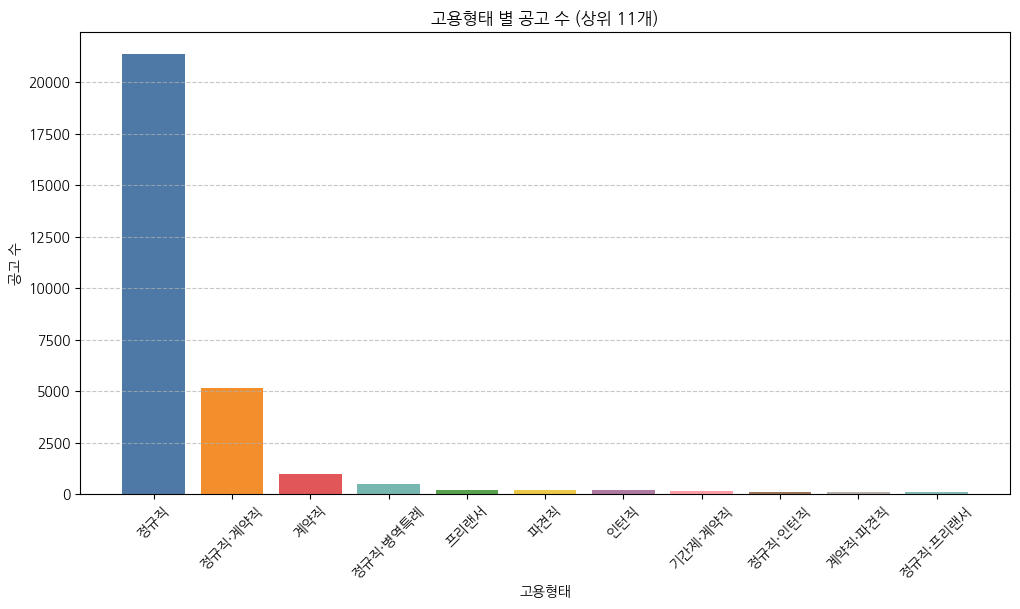

In [84]:
# 상위 11개 시각화
jobtype = jobtype_df.head(11)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(jobtype['고용 형태'], jobtype['공고 수'], color=['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F', '#EDC949', '#AF7AA1', '#FF9DA7', '#9C755F', '#BAB0AC', '#86BCB6'])
plt.xlabel("고용형태")
plt.ylabel("공고 수")
plt.title("고용형태 별 공고 수 (상위 11개)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 표시
plt.show()

In [86]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   ------- ------------------------------- 61.4/299.9 kB 656.4 kB/s eta 0:00:01
   ---------------------------------------  297.0/299.9 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 299.9/299.9 kB 2.3 MB/s eta 0:00:00


In [97]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

# 공고 제목에서 불필요한 특수문자 제거 후 단어 리스트 생성
titles = " ".join(df['title'])
words = re.findall(r'\b\w+\b', titles.lower())

# 불용어 제거
stopwords = {'경력사원', '경력직','경력직원','신입사원' ,'2025년','상반기','1분기','및','채용공고',  '채용','공개채용','분야','부문별', '모집','25년','2025년도','공개','대규모', '서울', '담당','담당자', '관련', '전문', '경력', '신입', '정규직', '계약직', '직원', '사원', '관리', '우대', '가능', '지원', '대졸', '학력', '우대', '인턴', '공고', '업무'}
filtered_words = [word for word in words if word not in stopwords and len(word) > 1]

# 빈출 단어 분석
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# 데이터프레임 변환 후 표시
word_freq_df = pd.DataFrame(common_words, columns=['단어', '빈도'])
word_freq_df

,단어,빈도
0,개발자,2052
1,엔지니어,1256
2,개발,1234
3,마케팅,1205
4,영업,949
5,운영,699
6,경영지원,577
7,생산,575
8,마케터,562
9,인재채용,562


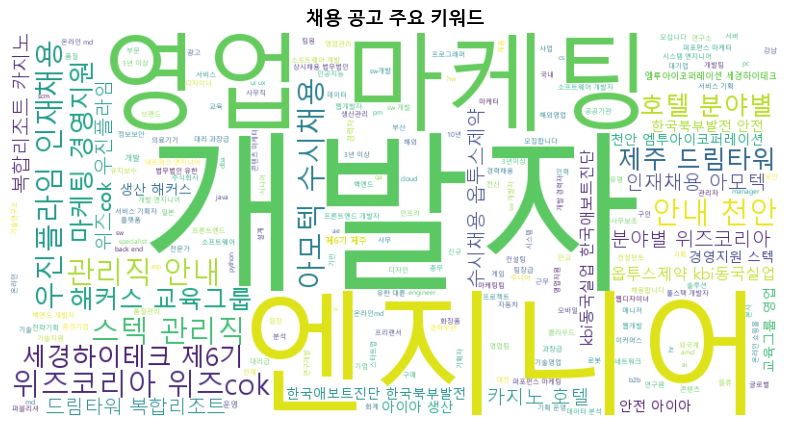

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# '맑은 고딕' 폰트 경로 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows에서 '맑은 고딕' 경로

# WordCloud 생성
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white', colormap='viridis').generate(" ".join(filtered_words))

# 워드클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("채용 공고 주요 키워드", fontsize=14, fontweight='bold')
plt.show()


In [105]:
import matplotlib.font_manager as fm

# 사용 가능한 한글 폰트 목록 출력
for font in fm.findSystemFonts():
    font_name = fm.FontProperties(fname=font).get_name()
    if any(k in font_name for k in ["Nanum", "Malgun", "AppleGothic", "Batang", "Dotum"]):
        print(font_name, ":", font)


Han Santteut Dotum : C:\Windows\Fonts\HanSantteutDotum-Regular.ttf
Malgun Gothic : C:\Windows\Fonts\malgunbd.ttf
NanumGothic : C:\Windows\Fonts\NanumGothic.ttf
HCR Batang ExtB : C:\Windows\Fonts\HANBatangExtBB.ttf
HCR Dotum Ext : C:\Windows\Fonts\HANDotumExt.ttf
HCR Dotum : C:\Windows\Fonts\HANDotum.ttf
HCR Batang : C:\Windows\Fonts\HANBatangB.ttf
KoPubWorldBatang : C:\Users\bang5\AppData\Local\Microsoft\Windows\Fonts\KoPubWorld Batang Medium.ttf
Han Santteut Dotum : C:\Windows\Fonts\HanSantteutDotum-Bold.ttf
Batang : C:\Windows\Fonts\batang.ttc
Malgun Gothic : C:\Windows\Fonts\malgun.ttf
HCR Batang : C:\Windows\Fonts\HANBatang.ttf
HCR Dotum : C:\Windows\Fonts\HANDotumB.ttf
HCR Batang ExtB : C:\Windows\Fonts\HANBatangExtB.ttf
HCR Batang Ext : C:\Windows\Fonts\HANBatangExt.ttf
Malgun Gothic : C:\Windows\Fonts\malgunsl.ttf


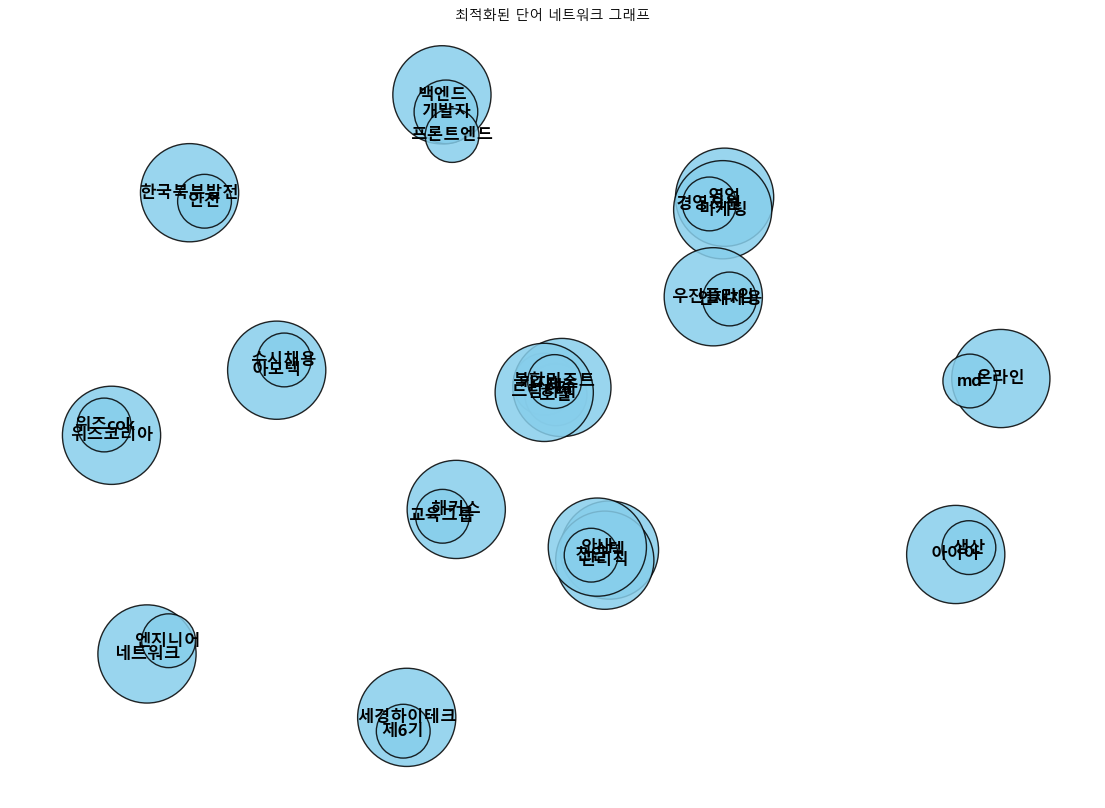

In [117]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import re
import matplotlib.font_manager as fm

# 📌 한글 폰트 직접 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows 사용자는 '맑은 고딕' 경로 사용
font_prop = fm.FontProperties(fname=font_path)

# 불용어 설정
# 불필요한 단어(불용어) 제거
stopwords = {'경력사원', '경력직','경력직원','신입사원' ,'2025년','상반기','1분기','및','채용공고', \
             '채용','공개채용','분야','부문별', '모집','25년','2025년도','공개','대규모', '서울', '담당','담당자',\
             '관련', '전문', '경력', '신입', '정규직', '계약직', '직원', '사원', '관리', '우대', '가능', '지원', \
             '대졸', '학력', '우대', '인턴', '공고', '업무'}

# 공고 제목에서 단어 리스트 추출
titles = df['title'].str.lower().tolist()
words_list = [re.findall(r'\b\w+\b', title) for title in titles]

# 불용어 제거 후 단어쌍(연관 관계) 추출
filtered_words_list = [[word for word in words if word not in stopwords and len(word) > 1] for words in words_list]
word_pairs = list(itertools.chain(*[list(itertools.combinations(words, 2)) for words in filtered_words_list]))

# 단어 쌍의 빈도 계산 (연결 강도)
word_pair_counts = Counter(word_pairs)
top_pairs = word_pair_counts.most_common(30)  # 상위 30개 단어쌍만 사용

# 네트워크 그래프 생성
G = nx.Graph()
for (word1, word2), count in top_pairs:
    G.add_edge(word1, word2, weight=count)

# 📌 노드 간격 조정 (k 값 높이면 더 넓게 퍼짐)
pos = nx.spring_layout(G, seed=42, k=0.7)  # 기본값보다 넓게 배치

# 노드 크기 조정 (빈도에 따라 차등 적용하되, 최대 크기 제한)
node_size = {word: min(2000 + word_pair_counts.get((word, word2), 0) * 20, 5000) for word, word2 in G.edges()}

# 시각화
plt.figure(figsize=(14, 10))

# 네트워크 그래프 그리기 (색상 최적화)
nx.draw_networkx_nodes(G, pos, node_size=[node_size.get(node, 1500) for node in G.nodes()], node_color="skyblue", alpha=0.85, edgecolors="black")
nx.draw_networkx_edges(G, pos, width=2, edge_color="deepskyblue", alpha=0.6)

# 📌 한글 폰트 적용하여 라벨 표시 (겹치지 않도록 크기 줄임)
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold", font_color="black",  font_family=font_prop.get_name())

# 제목 설정 (한글 폰트 적용)
plt.title("최적화된 단어 네트워크 그래프", fontsize=16, fontweight="bold", fontproperties=font_prop)
plt.axis("off")
plt.show()


# 불필요한 단어(불용어) 제거
stopwords = {'경력사원', '경력직','경력직원','신입사원' ,'2025년','상반기','1분기','및','채용공고', \
             '채용','공개채용','분야','부문별', '모집','25년','2025년도','공개','대규모', '서울', '담당','담당자',\
             '관련', '전문', '경력', '신입', '정규직', '계약직', '직원', '사원', '관리', '우대', '가능', '지원', \
             '대졸', '학력', '우대', '인턴', '공고', '업무'}


In [118]:
stopwords = {'경력사원', '경력직','경력직원','신입사원' ,'2025년','상반기','1분기','및','채용공고', \
             '채용','공개채용','분야','부문별', '모집','25년','2025년도','공개','대규모', '서울', '담당','담당자',\
             '관련', '전문', '경력', '신입', '정규직', '계약직', '직원', '사원', '관리', '우대', '가능', '지원', \
             '대졸', '학력', '우대', '인턴', '공고', '업무'}
# 공고 제목에서 단어 리스트 추출
titles = df['title'].str.lower().tolist()
words_list = [re.findall(r'\b\w+\b', title) for title in titles]

# 불용어 제거 후 단어쌍(연관 관계) 추출
filtered_words_list = [[word for word in words if word not in stopwords and len(word) > 1] for words in words_list]
word_pairs = list(itertools.chain(*[list(itertools.combinations(words, 2)) for words in filtered_words_list]))

# 단어 쌍의 빈도 계산 (동시 출현 빈도)
word_pair_counts = Counter(word_pairs)

# 키워드 쌍 동시 출현 빈도 데이터 생성
co_occurrence_df = pd.DataFrame(word_pair_counts.most_common(), columns=['단어 쌍', '출현 빈도'])
co_occurrence_df

,단어 쌍,출현 빈도
0,"(영업, 마케팅)",533
1,"(위즈코리아, 위즈cok)",519
2,"(마케팅, 경영지원)",519
3,"(우진플라임, 인재채용)",518
4,"(스텍, 관리직)",518
...,...,...
117440,"(plm, 유지보수)",1
117441,"(윈도우기반, 응용프로그래머)",1
117442,"(윈도우기반, 개발자)",1
117443,"(응용프로그래머, 개발자)",1


#### 참고 블로그
https://m.blog.naver.com/j7youngh/222929522859

In [120]:
#!pip install pyLDAvis

  Obtaining dependency information for pyLDAvis from https://files.pythonhosted.org/packages/6b/5a/66364c6799f2362bfb9b7100bc1ce6ffcdfe7f17e8d2e85a591bfe427643/pyLDAvis-3.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for funcy from https://files.pythonhosted.org/packages/d5/08/c2409cb01d5368dcfedcbaffa7d044cc8957d57a9d0855244a5eb4709d30/funcy-2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for FuzzyTM>=0.4.0 from https://files.pythonhosted.org/packages/2d/30/074bac7a25866a2807c1005c7852c0139ac22ba837871fc01f16df29b9dc/FuzzyTM-2.0.9-py3-none-any.whl.metadata
  Obtaining dependency information for pyfume from https://files.pythonhosted.org/packages/ed/ea/a3b120e251145dcdb10777f2bc5f18b1496fd999d705a178c1b0ad947ce1/pyFUME-0.3.4-py3-none-any.whl.metadata
  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/65/76/903324159e4a3566e518c558aeb21571d642f781d842d8dd0fd9c6b0645a/scipy-1.10.1-cp311-cp311-win_amd64.whl.met

k=2, Coherence Score: 0.6344000577030202
k=3, Coherence Score: 0.6030323677756361
k=4, Coherence Score: 0.5633634773854419
k=5, Coherence Score: 0.5470684150704443
k=6, Coherence Score: 0.5352369833284327
k=7, Coherence Score: 0.5569341188881393
k=8, Coherence Score: 0.5281319265125104
k=9, Coherence Score: 0.5438514709491371


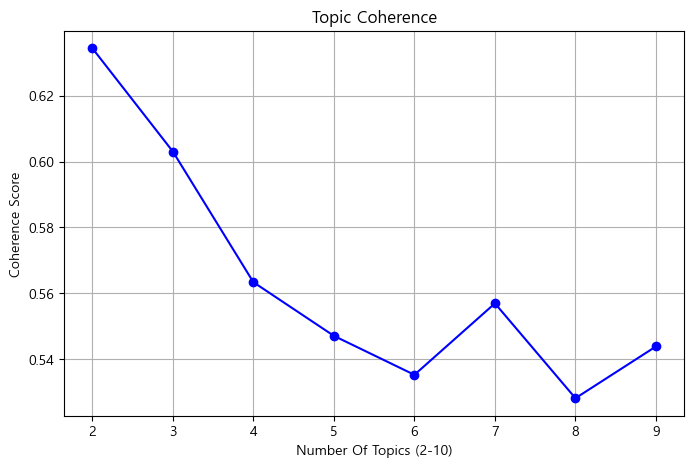

In [121]:
# 필요한 라이브러리 불러오기
import gensim
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel

# 토큰 리스트 (filtered_words_list 사용)
tokens = filtered_words_list

# Gensim의 Dictionary 생성 (토큰을 ID로 변환)
dictionary = corpora.Dictionary(tokens)
dictionary.filter_extremes(no_below=2, no_above=0.5)  # 빈도 2 이상 포함, 전체 문서의 50% 이상 등장하는 단어 제거

# Corpus 생성 (토큰을 Bag-of-Words 형태로 변환)
corpus = [dictionary.doc2bow(token) for token in tokens]

# 최적의 토픽 개수 찾기
coherence_score = []
k_values = list(range(2, 10))  # 토픽 개수 2~10

for i in k_values:
    model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=i, passes=5)
    coherence_model = CoherenceModel(model, texts=tokens, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model.get_coherence()
    print(f'k={i}, Coherence Score: {coherence_lda}')
    coherence_score.append(coherence_lda)

# 토픽 개수별 Coherence Score 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_values, coherence_score, marker="o", linestyle="-", color="b")
plt.title('Topic Coherence')
plt.xlabel('Number Of Topics (2-10)')
plt.ylabel('Coherence Score')
plt.grid(True)
plt.show()



In [123]:
# 최적의 토픽 개수를 사용하여 LDA 모델 생성
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, passes=10)

# pyLDAvis 시각화 데이터 생성
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

# pyLDAvis 시각화 실행
pyLDAvis.display(lda_vis)

In [130]:
# NaN 값을 제외하고 직무별 빈도수 계산
all_jobparts = df['jobpart'].dropna().str.split(', ').explode()  # NaN 제거 후 분리

# 각 직무별 빈도수 계산
jobpart_counts = all_jobparts.value_counts()

# 데이터프레임 변환 후 표시
jobpart_df = pd.DataFrame({'직무': jobpart_counts.index, '공고 수': jobpart_counts.values})

jobpart_df 

,직무,공고 수
0,백엔드/서버개발,1676
1,웹개발,1309
2,기술지원,1224
3,SE(시스템엔지니어),1071
4,유지보수,1067
5,데이터분석,882
6,네트워크,801
7,데이터분석가,697
8,데이터엔지니어,619
9,사무보조,538


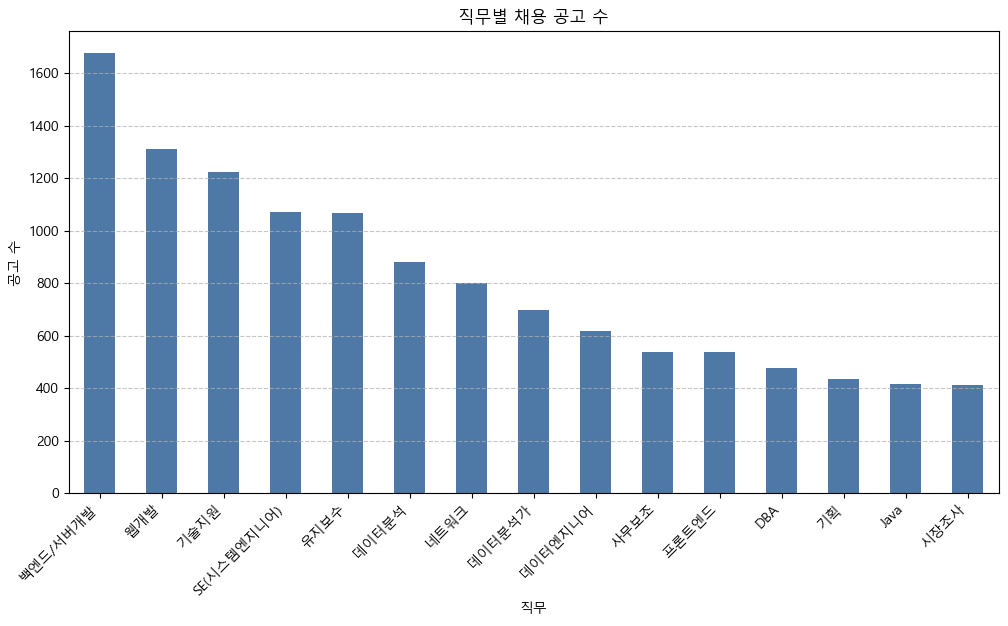

In [131]:
# 상위 15개 
top_jobparts = jobpart_counts.head(15)

plt.figure(figsize=(12, 6))
top_jobparts.plot(kind='bar', color='#4E79A7')
plt.xlabel("직무")
plt.ylabel("공고 수")
plt.title("직무별 채용 공고 수")
plt.xticks(rotation=45, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 그래프 표시
plt.show()